In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Astronomy import *
from Make_Data_Tools import *
from cut_resize_tools import *

from astropy.io import fits

In [2]:
hdu = fits.open("/home/filament/fujimoto/fits/Cygnus_sp16_vs-40_ve040_dv0.25_12CO_Tmb.fits")[0]

In [3]:
vsmooth = 5
thresh = 1
sigma = 1
sch_rms = 10
ech_rms = 90
sch_ii = 121
ech_ii = 241
percentile = 99.998
sigma_multiply = 15

cut_size_list = [256, 128, 64]
integrate_layer_num = 30
obj_size = 100
obj_sig = 7.5
maximum_mode = "percentile"
integrate_layer_num = 30

In [4]:
x_min = 300
x_max = 700
y_min = 800
y_max = 1200

raw_data = hdu.data
select_data = raw_data[121:241, y_min:y_max, x_min:x_max]
integ_data = integrate_to_x_layers(select_data, 30)

In [4]:
select_ch = 9

In [5]:
integ_data.shape

(30, 400, 400)

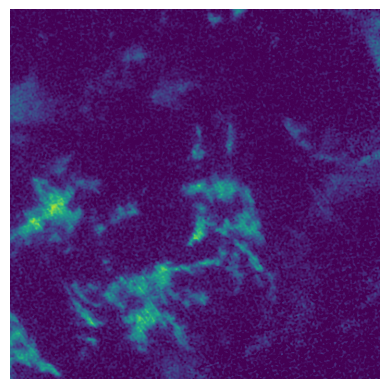

In [6]:
plt.imshow(integ_data[select_ch], cmap="viridis", vmin=0, vmax=150)
plt.axis("off")
plt.savefig(f"before{select_ch}.png", dpi=1000)
plt.show()

In [24]:
proccessed_data = process_data_segment(raw_data[:, y_min-2:y_max+2, x_min-2:x_max+2], vsmooth, sch_rms, ech_rms, sch_ii, ech_ii, sigma, thresh, integrate_layer_num)

In [25]:
proccessed_data = gaussian_filter(proccessed_data)

proccessed_data.shape

(30, 400, 400)

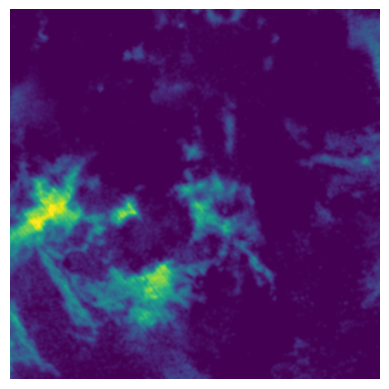

In [49]:
plt.imshow(proccessed_data[select_ch+5], cmap="viridis", vmin=0, vmax=350)
plt.axis("off")
plt.savefig(f"after{select_ch}.png", dpi=1000)
plt.show()

In [5]:
max_thresh = maximum_value_determination(mode="percentile", data=raw_data, vsmooth=vsmooth, sch_rms=sch_rms, ech_rms=ech_rms, sch_ii=sch_ii, 
                                ech_ii=ech_ii, sigma=sigma, thresh=thresh, integrate_layer_num=integrate_layer_num, obj_size=obj_size, obj_sig=obj_sig, percentile=99.998)

======== maximum determination ========
-------- making v_convolution data --------
-------- mmasking data --------


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


-------- integrating and xy_convolution --------
percentile value is 204.85


In [ ]:
print(f"percentile value is", "{:.2f}".format(max_thresh))